In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

bright_palette = ["#4B0082", "#3D5AFE", "#FF00FF", "#00FFFF", "#8A2BE2", "#FFFFFF"]
sns.set_palette(bright_palette)


In [4]:
main_df = pd.read_csv('OBRIO Test task data - tickets.csv')

In [5]:
main_df.dropna(subset=['agent'], inplace=True)
main_df.isnull().sum()

ticket_id             0
request_datetime      0
agent                 0
agent_team            0
request_type          0
reply_time            0
satisfaction_score    0
dtype: int64

In [6]:
main_df.loc[~main_df.duplicated(subset=['ticket_id'])].reset_index(drop=True)

,ticket_id,request_datetime,agent,agent_team,request_type,reply_time,satisfaction_score
0,426981,2024-05-31 23:59,Jim,Team 1,Product 1,84,Unoffered
1,426980,2024-05-31 23:57,Trevor,Team 1,Product 1,90,Offered
2,426979,2024-05-31 23:56,Trevor,Team 1,Other,93,Unoffered
3,426978,2024-05-31 23:55,Jim,Team 1,Other,14,Unoffered
4,426977,2024-05-31 23:55,Fate,Team 1,Other,37,Unoffered
...,...,...,...,...,...,...,...
46018,378447,2024-05-01 0:06,Tracy,Team 3,Product 1,510,Offered
46019,378446,2024-05-01 0:05,Jeff,Team 3,Tech issue,380,Unoffered
46020,378445,2024-05-01 0:04,Dwight,Team 1,Product 1,90,Offered
46021,378444,2024-05-01 0:03,Charles,Team 3,Tech issue,305,Unoffered


In [7]:
main_df['agent_team'] = main_df['agent_team'].astype(str)
main_df['agent_team'] = main_df['agent_team'].str.strip()
main_df['satisfaction_score'] = main_df['satisfaction_score'].astype(str)
main_df['request_datetime'] = pd.to_datetime(main_df['request_datetime'])
main_df['reply_time'] = pd.to_numeric(main_df['reply_time'], errors='coerce')

main_df.head()
main_df.info()
for column in main_df.columns:
    print('\n', main_df[column].value_counts(normalize=True) * 100)
    print('\n', main_df[column].describe())

<class 'pandas.core.frame.DataFrame'>
Index: 46030 entries, 0 to 46870
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ticket_id           46030 non-null  int64         
 1   request_datetime    46030 non-null  datetime64[ns]
 2   agent               46030 non-null  object        
 3   agent_team          46030 non-null  object        
 4   request_type        46030 non-null  object        
 5   reply_time          46030 non-null  int64         
 6   satisfaction_score  46030 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 2.8+ MB

 ticket_id
406891    0.004345
424444    0.004345
413059    0.004345
392414    0.004345
392413    0.004345
            ...   
378447    0.002172
378446    0.002172
378445    0.002172
378444    0.002172
426958    0.002172
Name: proportion, Length: 46023, dtype: float64

 count     46030.000000
mean     402691.951553
std    


Average waiting time

In [8]:
# mapping = {'Good': 0, 'Neutral': 1, 'Bad': -1}
# main_df['satisfaction_score'] = main_df['satisfaction_score'].map(mapping)
main_df['date'] = main_df['request_datetime'].dt.date
main_df

,ticket_id,request_datetime,agent,agent_team,request_type,reply_time,satisfaction_score,date
0,426981,2024-05-31 23:59:00,Jim,Team 1,Product 1,84,Unoffered,2024-05-31
1,426980,2024-05-31 23:57:00,Trevor,Team 1,Product 1,90,Offered,2024-05-31
2,426979,2024-05-31 23:56:00,Trevor,Team 1,Other,93,Unoffered,2024-05-31
3,426978,2024-05-31 23:55:00,Jim,Team 1,Other,14,Unoffered,2024-05-31
4,426977,2024-05-31 23:55:00,Fate,Team 1,Other,37,Unoffered,2024-05-31
...,...,...,...,...,...,...,...,...
46866,378447,2024-05-01 00:06:00,Tracy,Team 3,Product 1,510,Offered,2024-05-01
46867,378446,2024-05-01 00:05:00,Jeff,Team 3,Tech issue,380,Unoffered,2024-05-01
46868,378445,2024-05-01 00:04:00,Dwight,Team 1,Product 1,90,Offered,2024-05-01
46869,378444,2024-05-01 00:03:00,Charles,Team 3,Tech issue,305,Unoffered,2024-05-01


time_category
30-90 mins    34.255920
0-30 mins     33.801868
>90mins       31.942212
Name: proportion, dtype: float64


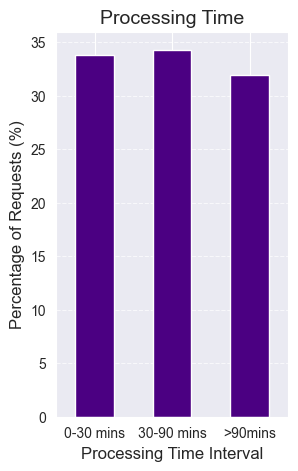

In [28]:
# Define time intervals (bins) and labels
bins = [0,30, 90, float('inf')]
labels = ['0-30 mins', '30-90 mins','>90mins']

# Categorize processing times into bins
main_df['time_category'] = pd.cut(main_df['reply_time'], bins=bins, labels=labels, right=False)

# Calculate percentage distribution
distribution = main_df['time_category'].value_counts(normalize=True) * 100

# Display the distribution
print(distribution)

# Plot the distribution as a bar chart
plt.figure(figsize=(3, 5))
distribution.sort_index().plot(kind='bar')
plt.title('Processing Time', fontsize=14)
plt.xlabel('Processing Time Interval', fontsize=12)
plt.ylabel('Percentage of Requests (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

AGENT-BASED ANALYSIS

,agent_team,agent,days_on_work
1,Team 1,Fate,31
3,Team 1,Jim,31
5,Team 1,Markus,31
4,Team 1,Leo,31
7,Team 1,Scott,31
11,Team 2,Emma,31
10,Team 2,Dean,31
8,Team 1,Trevor,31
33,Team 3,Lisa,31
37,Team 3,Steve,31


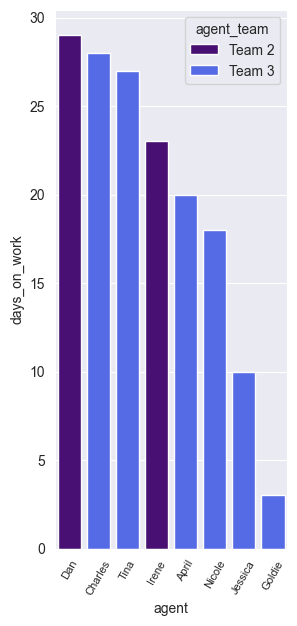

In [9]:
main_df['date'] = pd.to_datetime(main_df['date'])
agent_days_df = main_df.groupby(['agent_team', 'agent']).agg(days_on_work=('date', 'nunique')).reset_index().sort_values(by='days_on_work', ascending=False)
plt.figure(figsize=(3,7))
sns.barplot(data=agent_days_df[-9:-1], x='agent', y='days_on_work',hue='agent_team')
plt.xticks(rotation=60, size=8)
agent_days_df

In [10]:
agent_df = main_df.groupby(['agent','agent_team','satisfaction_score']).agg(avg_reply_time=('reply_time', 'mean'), tickets_number=('ticket_id', 'nunique'), days_on_work=('date','nunique')).reset_index()


agent_df

,agent,agent_team,satisfaction_score,avg_reply_time,tickets_number,days_on_work
0,April,Team 3,Bad,55.000000,2,1
1,April,Team 3,Bad with Comment,247.000000,5,5
2,April,Team 3,Good,336.823529,17,11
3,April,Team 3,Good with Comment,317.687500,16,11
4,April,Team 3,Offered,366.164474,304,20
...,...,...,...,...,...,...
220,Zoe,Team 2,Bad with Comment,20.100000,10,10
221,Zoe,Team 2,Good,23.984375,64,25
222,Zoe,Team 2,Good with Comment,26.578947,38,19
223,Zoe,Team 2,Offered,24.084222,938,31


In [11]:
# plt.figure(figsize=(10,7))
# plt.tick_params(axis='both',which='major', labelsize=10)
# plt.xticks(range(0, 24))
# 
# # for i in range(1,4):
# #     print(f'AVERAGE REPLY TIME DURING A DAY IN TEAM {i}: {main[main['agent_team'] == f'Team {i}']['avg_reply_time'].mean()}')
# most_common_category = df.groupby('manager_name')['category'].agg()
# sns.lineplot(x="agent", y="avg_reply_time", hue='',data=main_df, hue="agent_team")
# plt.show()




TEAM-BASED ANALYSIS

NUMBER OF AGENTS TEAM 1: 54
Team 1 cases: request_type
Product 1                 69.481448
Other                     17.287574
Product 2                  4.771581
Tech issue                 3.740498
Non-customer               1.512757
Email Marketing            1.249341
Empty                      1.204185
Personal data deletion     0.549409
Feedback/suggestion        0.203206
Name: proportion, dtype: float64

NUMBER OF AGENTS TEAM 2: 77
Team 2 cases: request_type
Product 1                 69.417284
Other                     17.690612
Product 2                  4.205053
Tech issue                 2.893800
Non-customer               1.396032
Customer Success           1.390380
Email Marketing            1.237778
Empty                      0.893009
Personal data deletion     0.712146
Feedback/suggestion        0.163907
Name: proportion, dtype: float64

NUMBER OF AGENTS TEAM 3: 94
Team 3 cases: request_type
Product 1                 59.322259
Other                     27.607973
Product 2  

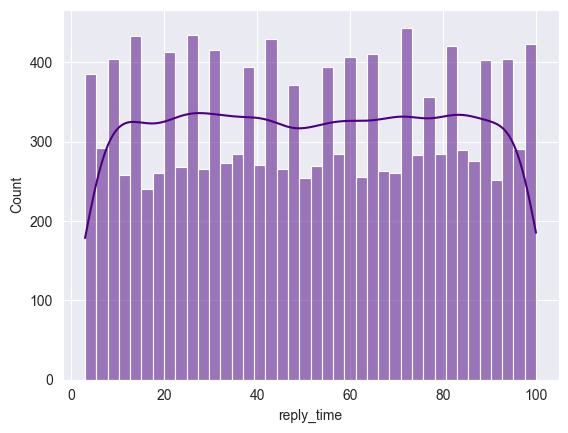

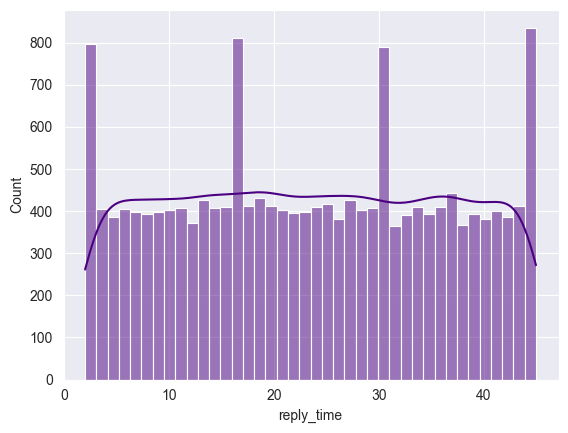

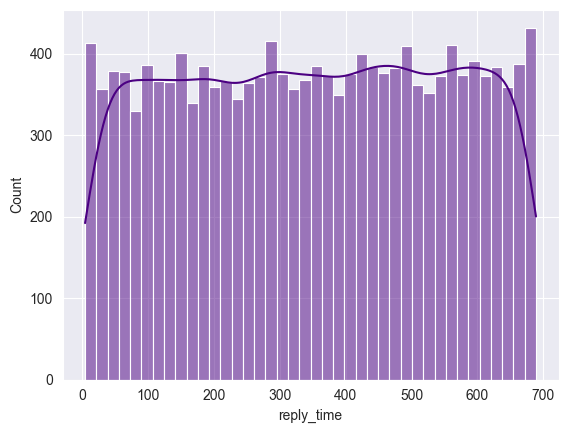

,avg_reply_time,tickets_number,agent_number
agent_team,,,
Team 1,51.620607,13286,9
Team 2,23.501893,17687,13
Team 3,349.319668,15050,18


In [12]:
team_df = main_df.groupby('agent_team').agg(avg_reply_time=('reply_time', 'mean'), tickets_number=('ticket_id', 'nunique'), agent_number=('agent', 'nunique'),)


for i in range(1,4):
    print(f'NUMBER OF AGENTS TEAM {i}: '
          f'{len(agent_df[agent_df['agent_team'] == f'Team {i}'])}')
    print(f'Team {i} cases: {main_df[main_df['agent_team'] == f"Team {i}"]['request_type'].value_counts(normalize=True) * 100}\n')
    
for i in range(1,4):
    sns.histplot(main_df[main_df['agent_team'] == f'Team {i}']['reply_time'], bins=40, kde=True, label=f'Team {i}')
    plt.show()
team_df

REQUEST TYPE-BASED ANALYSIS

In [13]:
request_df = main_df.groupby('request_type').agg(avg_reply_time=('reply_time', 'median'), tickets_number=('ticket_id', 'nunique'))
request_df

,avg_reply_time,tickets_number
request_type,,
Customer Success,114.0,586
Email Marketing,41.0,533
Empty,57.0,501
Feedback/suggestion,39.0,69
Non-customer,43.0,640
Other,59.0,9580
Personal data deletion,37.0,272
Product 1,41.0,30437
Product 2,42.0,1951


HOUR-BASED ANALYSIS

In [14]:
main_df.head()
main_df['hour'] = main_df['request_datetime'].dt.hour
main_df['date'] = main_df['request_datetime'].dt.date

hour_df = main_df.groupby(['hour', 'agent_team']).agg(avg_reply_time=('reply_time', 'median'), tickets_number=('ticket_id', 'nunique'),agents_number=('agent', 'nunique')).reset_index()

hour_df

,hour,agent_team,avg_reply_time,tickets_number,agents_number
0,0,Team 1,54.0,701,9
1,0,Team 2,23.0,734,13
2,0,Team 3,359.5,848,16
3,1,Team 1,53.0,625,9
4,1,Team 2,22.0,781,13
...,...,...,...,...,...
67,22,Team 2,22.0,834,13
68,22,Team 3,360.5,834,16
69,23,Team 1,52.0,984,9
70,23,Team 2,23.0,947,13


AVERAGE REPLY TIME DURING A DAY IN TEAM 1: 51.5625
AVERAGE REPLY TIME DURING A DAY IN TEAM 2: 23.291666666666668
AVERAGE REPLY TIME DURING A DAY IN TEAM 3: 350.9791666666667


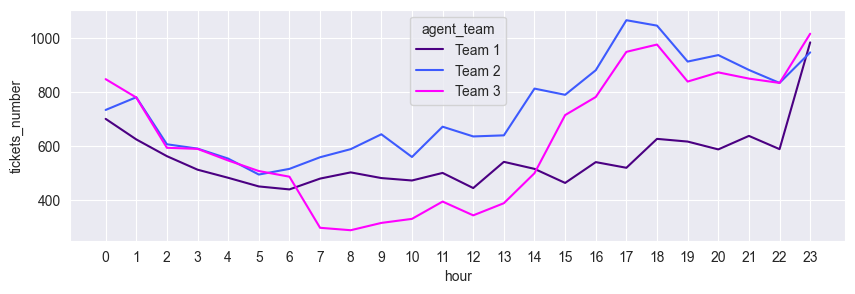

,hour,agent_team,avg_reply_time,tickets_number,agents_number
0,0,Team 1,54.0,701,9
1,0,Team 2,23.0,734,13
2,0,Team 3,359.5,848,16
3,1,Team 1,53.0,625,9
4,1,Team 2,22.0,781,13
...,...,...,...,...,...
67,22,Team 2,22.0,834,13
68,22,Team 3,360.5,834,16
69,23,Team 1,52.0,984,9
70,23,Team 2,23.0,947,13


In [15]:
plt.figure(figsize=(10,3))
plt.tick_params(axis='both',which='major', labelsize=10)
plt.xticks(range(0, 24))

for i in range(1,4):
    print(f'AVERAGE REPLY TIME DURING A DAY IN TEAM {i}: {hour_df[hour_df['agent_team'] == f'Team {i}']['avg_reply_time'].mean()}')

sns.lineplot(x="hour", y="tickets_number", data=hour_df, hue="agent_team")
plt.show()

hour_df

AVERAGE REPLY TIME DURING A DAY IN TEAM 1: 51.5625
AVERAGE REPLY TIME DURING A DAY IN TEAM 2: 23.291666666666668
AVERAGE REPLY TIME DURING A DAY IN TEAM 3: 350.9791666666667


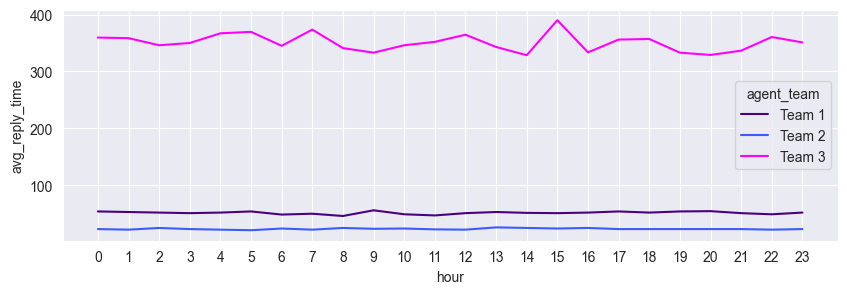

,hour,agent_team,avg_reply_time,tickets_number,agents_number
0,0,Team 1,54.0,701,9
1,0,Team 2,23.0,734,13
2,0,Team 3,359.5,848,16
3,1,Team 1,53.0,625,9
4,1,Team 2,22.0,781,13
...,...,...,...,...,...
67,22,Team 2,22.0,834,13
68,22,Team 3,360.5,834,16
69,23,Team 1,52.0,984,9
70,23,Team 2,23.0,947,13


In [16]:
plt.figure(figsize=(10,3))
plt.tick_params(axis='both',which='major', labelsize=10)
plt.xticks(range(0, 24))

for i in range(1,4):
    print(f'AVERAGE REPLY TIME DURING A DAY IN TEAM {i}: {hour_df[hour_df['agent_team'] == f'Team {i}']['avg_reply_time'].mean()}')

sns.lineplot(x="hour", y="avg_reply_time", data=hour_df, hue="agent_team")
plt.show()

hour_df

NUMBER OF AGENTS IN TEAM 1: 9
NUMBER OF AGENTS IN TEAM 2: 13
NUMBER OF AGENTS IN TEAM 3: 18
AVERAGE MANAGERS ON WORKS A DAY IN TEAM 1: 9.0
AVERAGE MANAGERS ON WORKS A DAY IN TEAM 2: 12.958333333333334
AVERAGE MANAGERS ON WORKS A DAY IN TEAM 3: 15.875


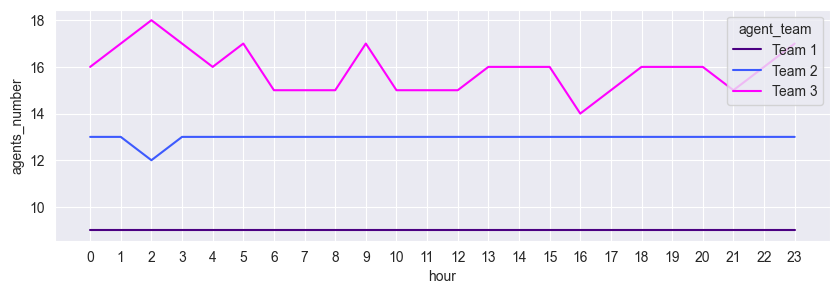

,hour,agent_team,avg_reply_time,tickets_number,agents_number
0,0,Team 1,54.0,701,9
1,0,Team 2,23.0,734,13
2,0,Team 3,359.5,848,16
3,1,Team 1,53.0,625,9
4,1,Team 2,22.0,781,13
...,...,...,...,...,...
67,22,Team 2,22.0,834,13
68,22,Team 3,360.5,834,16
69,23,Team 1,52.0,984,9
70,23,Team 2,23.0,947,13


In [17]:
plt.figure(figsize=(10,3))
plt.tick_params(axis='both',which='major', labelsize=10)
plt.xticks(range(0, 24))

print(f'NUMBER OF AGENTS IN TEAM 1: 9')
print(f'NUMBER OF AGENTS IN TEAM 2: 13')
print(f'NUMBER OF AGENTS IN TEAM 3: 18')
for i in range(1,4):
    print(f'AVERAGE MANAGERS ON WORKS A DAY IN TEAM {i}: {hour_df[hour_df['agent_team'] == f'Team {i}']['agents_number'].mean()}')

sns.lineplot(x="hour", y="agents_number", data=hour_df, hue="agent_team")
plt.show()

hour_df

1. У третьої команди в 7-13 години надходять менша кількість запитів
2. У друго команди запити зростають протягом 5-17 годин, далі менше плато

DATE-BASED ANALYSIS

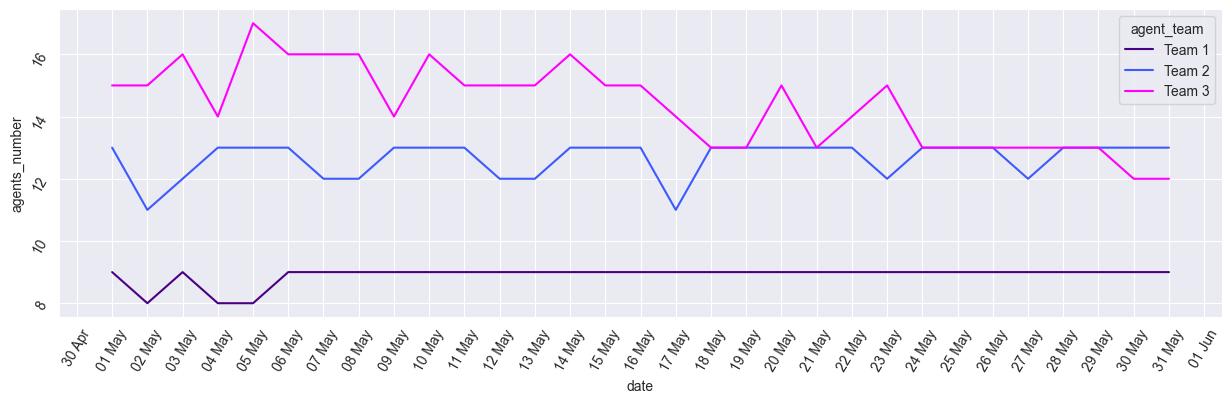

In [18]:
from matplotlib.ticker import MaxNLocator

date_df = main_df.groupby(['date', 'agent_team']).agg(avg_reply_time=('reply_time', 'mean'), tickets_number=('ticket_id', 'nunique'),agents_number=('agent', 'nunique')).reset_index()
date_df['date'] = pd.to_datetime(date_df['date'])

plt.figure(figsize=(15,4))
plt.tick_params(axis='both', which='major', labelsize=10, labelrotation=60)
sns.lineplot(x="date", y="agents_number", data=date_df, hue='agent_team')
# plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=31))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show ticks every 1 month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))  # Format as "Month Year"plt.gca()
plt.show()

AVERAGE TICKETS NUMBER IN TEAM 1: 553.5833333333334
AVERAGE TICKETS NUMBER IN TEAM 2: 736.9583333333334
AVERAGE TICKETS NUMBER IN TEAM 3: 627.0833333333334


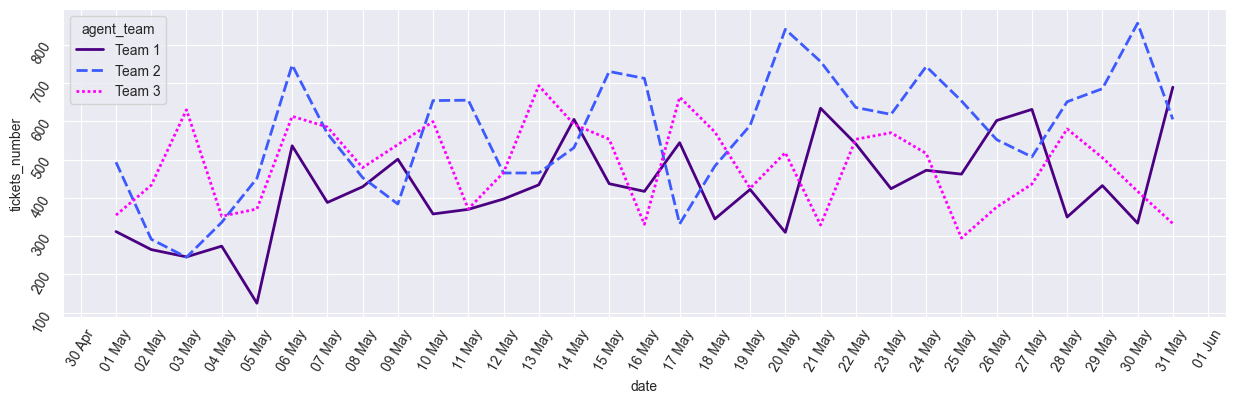

In [19]:
for i in range(1,4):
    print(f'AVERAGE TICKETS NUMBER IN TEAM {i}: {hour_df[hour_df['agent_team'] == f'Team {i}']['tickets_number'].mean()}')

plt.figure(figsize=(15,4))
plt.tick_params(axis='both', which='major', labelsize=10, labelrotation=60)
sns.lineplot(x="date", y="tickets_number", data=date_df, hue='agent_team',style='agent_team',linewidth=2)
# plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=31))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show ticks every 1 month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))  # Format as "Month Year"plt.gca()

plt.show()


Чіткої динаміки, закономірності по дням немає

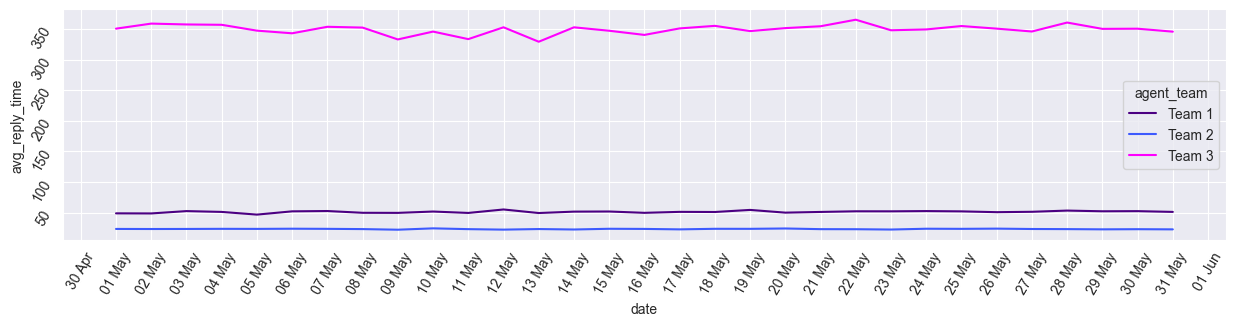

In [20]:
plt.figure(figsize=(15,3))
plt.tick_params(axis='both', which='major', labelsize=10, labelrotation=60)
sns.lineplot(x="date", y="avg_reply_time", data=date_df, hue='agent_team')
# plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=31))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show ticks every 1 month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))  # Format as "Month Year"plt.gca()

plt.show()

In [21]:
date_df

,date,agent_team,avg_reply_time,tickets_number,agents_number
0,2024-05-01,Team 1,49.064103,312,9
1,2024-05-01,Team 2,23.620690,493,13
2,2024-05-01,Team 3,350.470423,355,15
3,2024-05-02,Team 1,48.916981,265,8
4,2024-05-02,Team 2,23.496575,292,11
...,...,...,...,...,...
88,2024-05-30,Team 2,23.199533,856,13
89,2024-05-30,Team 3,350.412470,417,12
90,2024-05-31,Team 1,51.419448,689,9
91,2024-05-31,Team 2,22.928926,605,13


1. Запити всередньому надходять стабільно протягом місяця

SATISFACTION-BASED ANALYSIS

In [22]:
for i in range(1,4):
    print(f'Team {i} cases: {main_df[main_df['agent_team'] == f"Team {i}"]['satisfaction_score'].value_counts(normalize=True) * 100}\n')

Team 1 cases: satisfaction_score
Offered              73.756303
Unoffered            17.550990
Good                  4.673741
Good with Comment     2.792203
Bad with Comment      0.699932
Bad                   0.526831
Name: proportion, dtype: float64

Team 2 cases: satisfaction_score
Offered              73.741028
Unoffered            17.990166
Good                  4.493302
Good with Comment     2.628158
Bad with Comment      0.723450
Bad                   0.423896
Name: proportion, dtype: float64

Team 3 cases: satisfaction_score
Offered              76.219269
Unoffered            16.451827
Good                  3.887043
Good with Comment     2.485050
Bad with Comment      0.604651
Bad                   0.352159
Name: proportion, dtype: float64



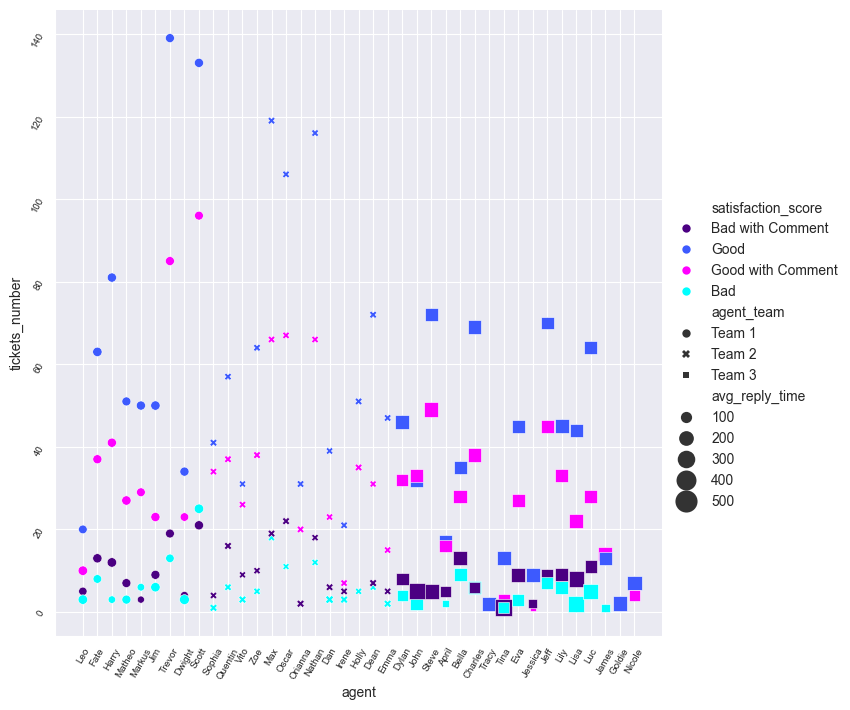

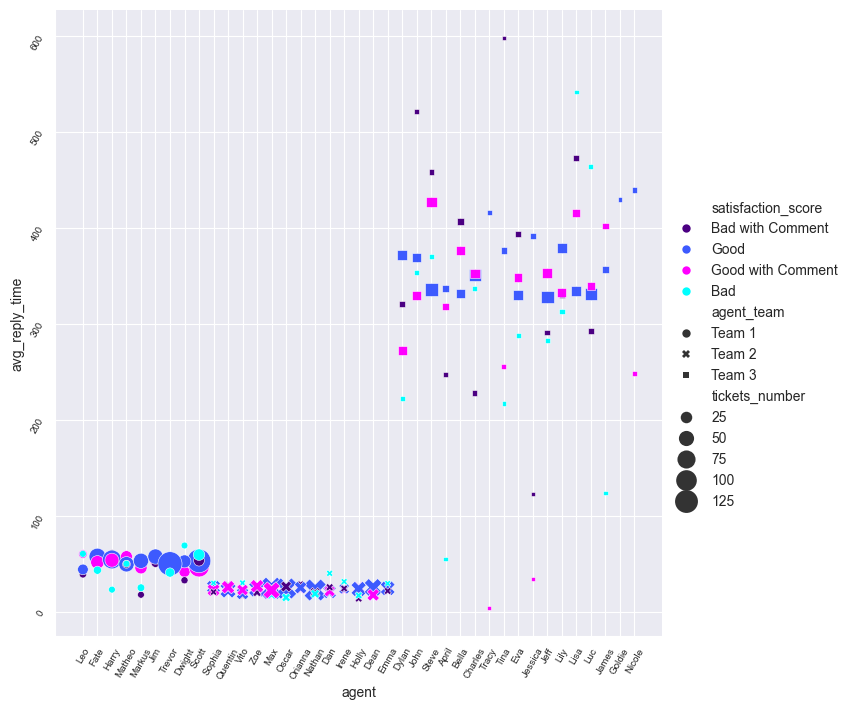

,agent,agent_team,satisfaction_score,avg_reply_time,tickets_number,days_on_work
0,April,Team 3,Bad,55.000000,2,1
1,April,Team 3,Bad with Comment,247.000000,5,5
2,April,Team 3,Good,336.823529,17,11
3,April,Team 3,Good with Comment,317.687500,16,11
4,April,Team 3,Offered,366.164474,304,20
5,April,Team 3,Unoffered,345.089744,78,18
6,Bella,Team 3,Bad,331.111111,9,7
7,Bella,Team 3,Bad with Comment,406.923077,13,8
8,Bella,Team 3,Good,331.657143,35,18
9,Bella,Team 3,Good with Comment,376.321429,28,15


In [23]:

sns.relplot(x="agent", y="tickets_number", data=agent_df[~agent_df["satisfaction_score"].isin(["Offered", "Unoffered"])].sort_values(by="agent_team"), sizes=(20, 300),hue='satisfaction_score',size='avg_reply_time',style='agent_team',height=7,aspect=1)
plt.tick_params(axis='both', which='major', labelsize=7, labelrotation=60)


# plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=31))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show ticks every 1 month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))  # Format as "Month Year"plt.gca()

plt.show()


sns.relplot(x="agent", y="avg_reply_time", data=agent_df[~agent_df["satisfaction_score"].isin(["Offered", "Unoffered"])].sort_values(by="agent_team"), sizes=(20, 300),hue='satisfaction_score',size='tickets_number',style='agent_team',height=7,aspect=1)
plt.tick_params(axis='both', which='major', labelsize=7, labelrotation=60)


# plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=31))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show ticks every 1 month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))  # Format as "Month Year"plt.gca()

plt.show()
agent_df.head(10)

In [24]:
good_ratio_df = agent_df.pivot_table(index=["agent","agent_team"], columns="satisfaction_score", values="tickets_number", aggfunc="sum", fill_value=0).reset_index()

# Calculate the ratio
good_ratio_df["good_ratio"] = (good_ratio_df["Good"] + good_ratio_df["Good with Comment"]) / (good_ratio_df["Bad"] + good_ratio_df["Bad with Comment"] + good_ratio_df["Good"] + good_ratio_df["Good with Comment"])*100

good_ratio_df["feedback_ratio"] = (good_ratio_df["Offered"]) / (good_ratio_df["Unoffered"] + good_ratio_df["Offered"])*100

good_ratio_df

satisfaction_score,agent,agent_team,Bad,Bad with Comment,Good,Good with Comment,Offered,Unoffered,good_ratio,feedback_ratio
0,April,Team 3,2,5,17,16,304,78,82.500000,79.581152
1,Bella,Team 3,9,13,35,28,1296,170,74.117647,88.403820
2,Charles,Team 3,6,6,69,38,1020,214,89.915966,82.658023
3,Dan,Team 2,3,6,39,23,877,88,87.323944,90.880829
4,Dean,Team 2,6,7,72,31,1196,239,88.793103,83.344948
5,Dwight,Team 1,3,4,34,23,941,128,89.062500,88.026193
6,Dylan,Team 3,4,8,46,32,627,166,86.666667,79.066835
7,Emma,Team 2,2,5,47,15,661,161,89.855072,80.413625
8,Eva,Team 3,3,9,45,27,1019,177,85.714286,85.200669
9,Fate,Team 1,8,13,63,37,1152,289,82.644628,79.944483


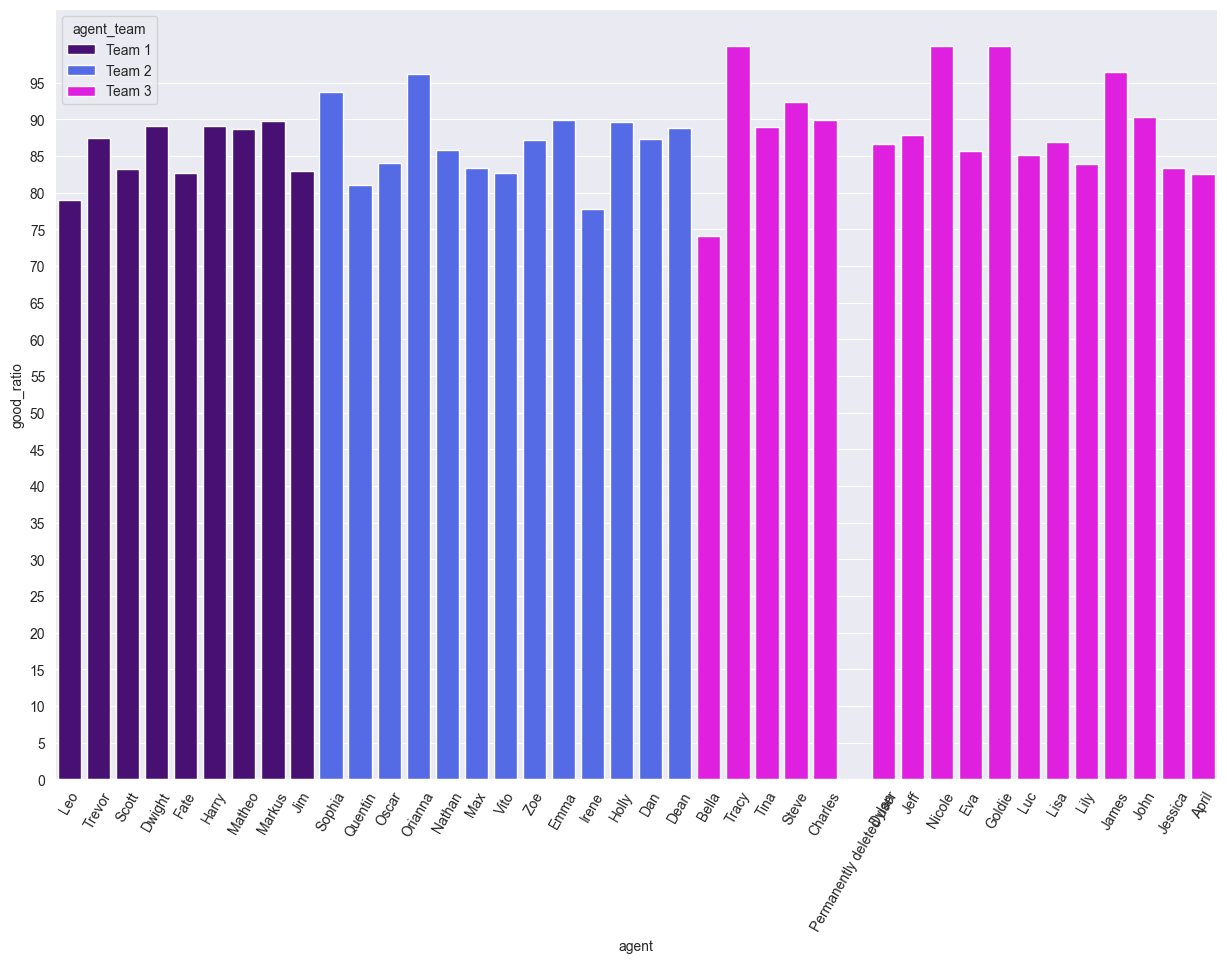

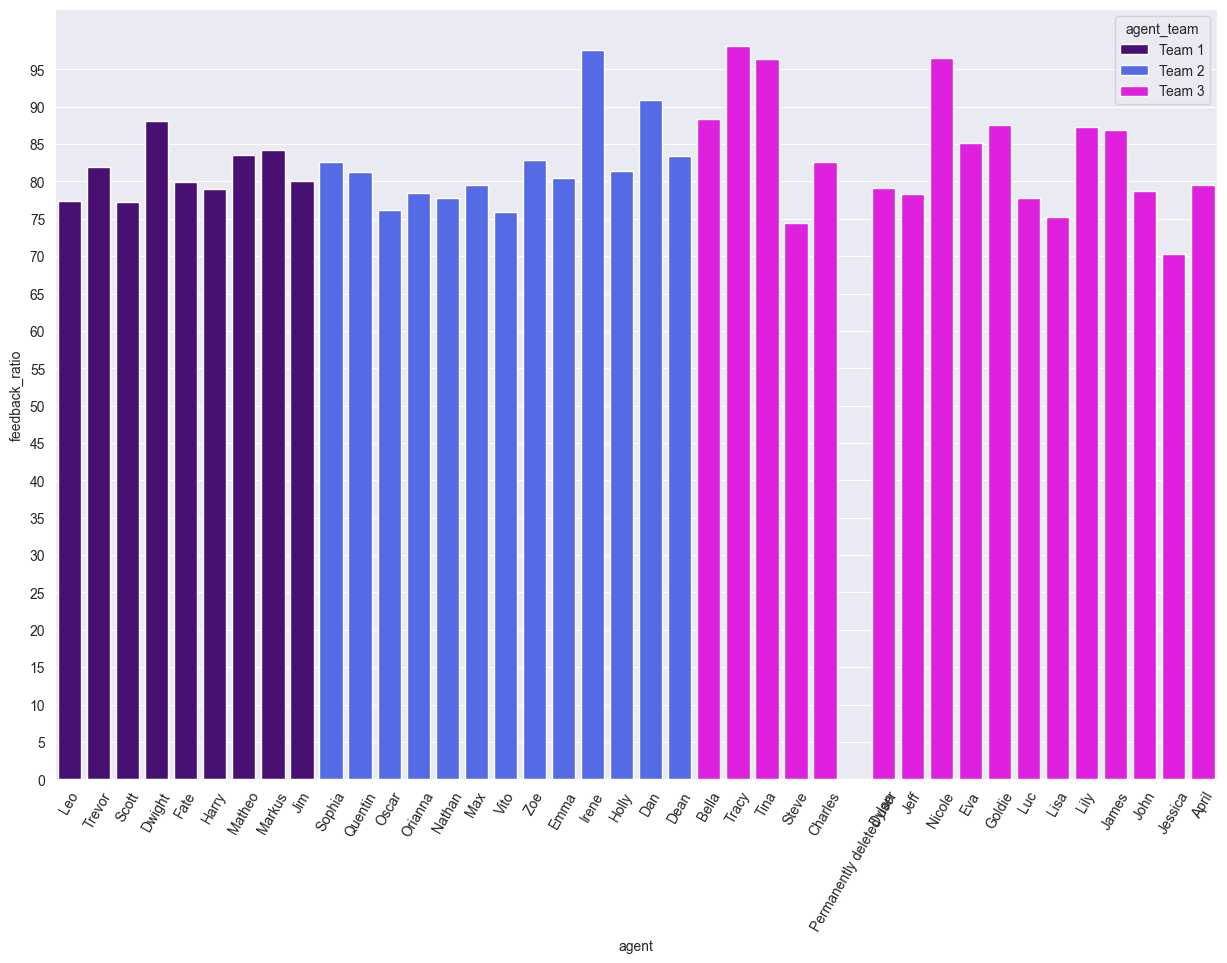

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(x="agent", y="good_ratio", data=good_ratio_df.sort_values(by="agent_team"),hue='agent_team')
plt.yticks(range(0, 100,5))
plt.tick_params(axis='y', which='major', labelsize=10)
plt.tick_params(axis='x', which='major', labelsize=10, labelrotation=60)


plt.show()

plt.figure(figsize=(15,10))
sns.barplot(x="agent", y="feedback_ratio", data=good_ratio_df.sort_values(by="agent_team"), hue='agent_team')

plt.yticks(range(0, 100,5))
plt.tick_params(axis='y', which='major', labelsize=10)
plt.tick_params(axis='x', which='major', labelsize=10, labelrotation=60)


plt.show()